In [221]:
# ! pip install plotly
# !pip install --upgrade plotly
# ! pip show nbformat


In [222]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import re
import plotly.express as px
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [223]:
df = pd.read_csv("nutrition_final.csv")
df.head()

,Unnamed: 0,category,product,name,natural_form,serving_size,calories,total_fat,saturated_fat,cholesterol,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Grains,Cornstarch,Cornstarch,edible,100 g,381,0.1g,NaN,0,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,Legumes and seeds,Nuts pecans,"Nuts, pecans",edible,100 g,691,72g,6.2g,0,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,Vegetables,Eggplant raw,"Eggplant, raw",raw,100 g,25,0.2g,NaN,0,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,Grains,Teff uncooked,"Teff, uncooked",raw,100 g,367,2.4g,0.4g,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,Fruits,Sherbet orange,"Sherbet, orange",edible,100 g,144,2g,1.2g,1mg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [224]:
df.drop(columns=['Unnamed: 0'],axis = 0, inplace= True)
df.columns


Index(['category', 'product', 'name', 'natural_form', 'serving_size',
       'calories', 'total_fat', 'saturated_fat', 'cholesterol', 'sodium',
       'choline', 'folate', 'folic_acid', 'niacin', 'pantothenic_acid',
       'riboflavin', 'thiamin', 'vitamin_a', 'vitamin_a_rae', 'carotene_alpha',
       'carotene_beta', 'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene',
       'vitamin_b12', 'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e',
       'tocopherol_alpha', 'vitamin_k', 'calcium', 'copper', 'irom',
       'magnesium', 'manganese', 'phosphorous', 'potassium', 'selenium',
       'zink', 'protein', 'alanine', 'arginine', 'aspartic_acid', 'cystine',
       'glutamic_acid', 'glycine', 'histidine', 'hydroxyproline', 'isoleucine',
       'leucine', 'lysine', 'methionine', 'phenylalanine', 'proline', 'serine',
       'threonine', 'tryptophan', 'tyrosine', 'valine', 'carbohydrate',
       'fiber', 'sugars', 'fructose', 'galactose', 'glucose', 'lactose',
       'maltose', 'sucrose

In [225]:
df.head(1)

,category,product,name,natural_form,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Grains,Cornstarch,Cornstarch,edible,100 g,381,0.1g,NaN,0,9.00 mg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   category                     8789 non-null   object
 1   product                      8789 non-null   object
 2   name                         8789 non-null   object
 3   natural_form                 8789 non-null   object
 4   serving_size                 8789 non-null   object
 5   calories                     8789 non-null   int64 
 6   total_fat                    8789 non-null   object
 7   saturated_fat                7199 non-null   object
 8   cholesterol                  8789 non-null   object
 9   sodium                       8789 non-null   object
 10  choline                      8789 non-null   object
 11  folate                       8789 non-null   object
 12  folic_acid                   8789 non-null   object
 13  niacin                       8789


# Analyze the distribution of key nutritional components


In [227]:
nutrients = df[['category', 'product', 'serving_size', 'calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
nutrients.head(1)

,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars
0,Grains,Cornstarch,100 g,381,0.26 g,0.1g,91.27 g,0.9 g,0.00 g


In [228]:
columns_to_convert = ['serving_size' ,'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']

for column in columns_to_convert:
    nutrients[column] = pd.to_numeric(nutrients[column].apply(lambda x: float(re.sub(r'\s*g$', '', x)) if isinstance(x, str) and re.search(r'\s*g$', x) else x))
    
nutrients.head(1)  
# nutrients.to_csv("nutrients.csv", index = False)     


/var/folders/z9/jtl_p9fs1ynd259y2nmp4bfh0000gn/T/ipykernel_93045/1043148987.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,category,product,serving_size,calories,protein,total_fat,carbohydrate,fiber,sugars
0,Grains,Cornstarch,100.0,381,0.26,0.1,91.27,0.9,0.0


# 

In [229]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      8789 non-null   object 
 1   product       8789 non-null   object 
 2   serving_size  8789 non-null   float64
 3   calories      8789 non-null   int64  
 4   protein       8789 non-null   float64
 5   total_fat     8789 non-null   float64
 6   carbohydrate  8789 non-null   float64
 7   fiber         8789 non-null   float64
 8   sugars        8789 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 618.1+ KB


In [230]:
nutrients.isna().sum()

category        0
product         0
serving_size    0
calories        0
protein         0
total_fat       0
carbohydrate    0
fiber           0
sugars          0
dtype: int64

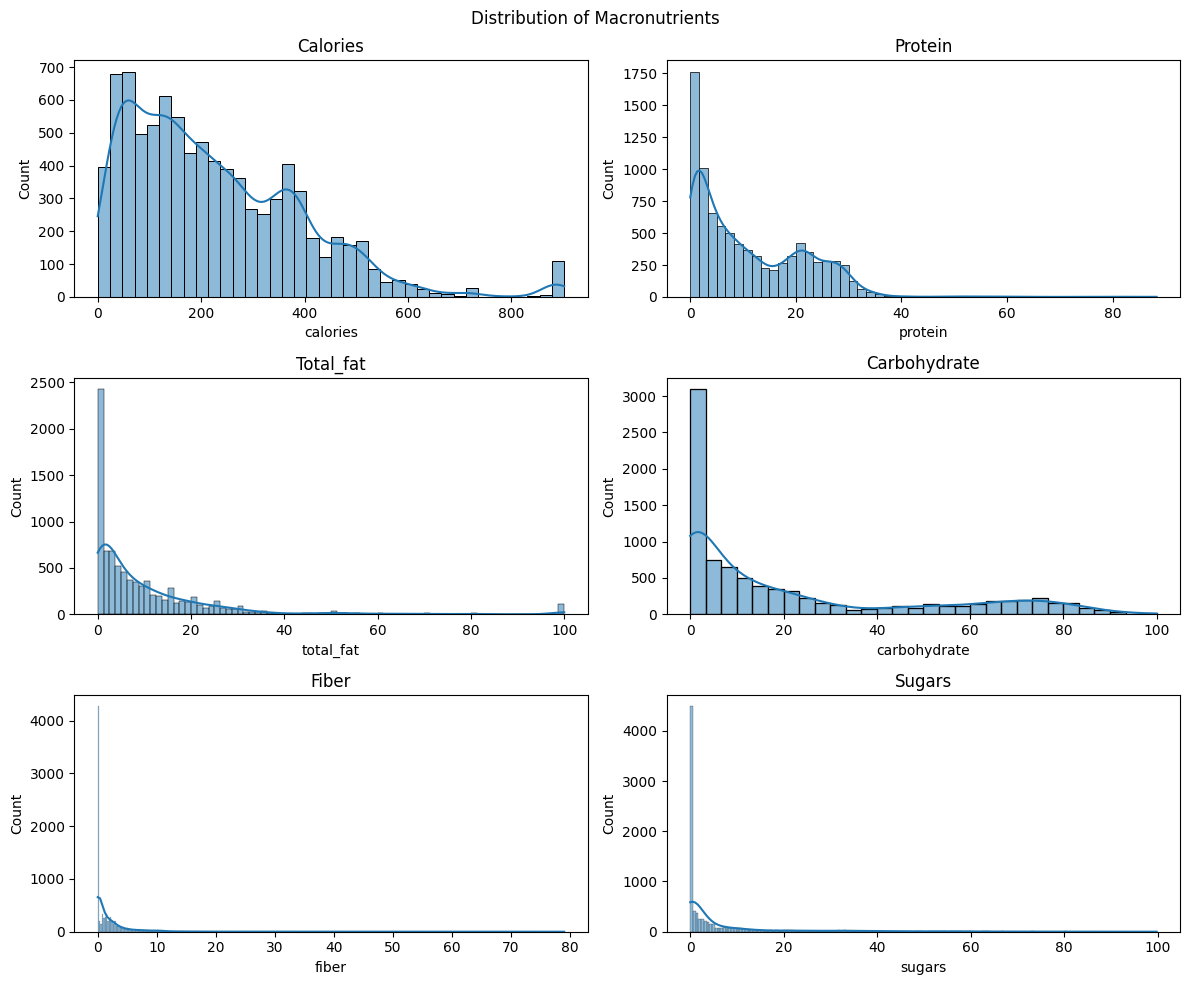

In [231]:
macronutrients = nutrients[['calories', 'protein', 'total_fat', 'carbohydrate', 'fiber', 'sugars']]
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distribution of Macronutrients')

for i, nutrient in enumerate(macronutrients):
    sns.histplot(nutrients[nutrient], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(nutrient.capitalize())

plt.tight_layout()
plt.show()


In [232]:
nutrients['category'].unique()

array(['Grains', 'Legumes and seeds', 'Vegetables', 'Fruits', 'Red Meat',
       'Dairy', 'Sauce', 'Snacks', 'Poultry', 'Condiments', 'Eggs',
       'Miscellaneous Ingredients', 'Seafood', 'Oil', 'Beverages'],
      dtype=object)

# Food with the highest protien overall

In [233]:
protein_rich= nutrients.sort_values(by='protein', ascending= False)
top_20 = protein_rich.head(20)
fig = px.bar(top_20, x='product', y='protein', color='protein', title='Top 10 protein rich foods', width=1000, height=800, text = 'protein', text_auto = '.2f')
fig.show()

# Food with highest protien in each category

In [ ]:
protein_rich = nutrients.sort_values(by='protein', ascending=False)
top_protein_per_category = protein_rich.groupby('category').first().reset_index()
fig = px.bar(top_protein_per_category, x='category', y='protein', color='protein', 
            title='Top 10 protein rich foods in each category',            
            width=1000, height=800,         
            text='product',
            text_auto = '.2f')


fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()

# Food with highest calories in each category

In [266]:
calories_rich = nutrients.sort_values(by='calories', ascending=False)
top_calories_per_category = (calories_rich.groupby('category').first().reset_index())
fig = px.bar(top_calories_per_category, x='category', y='calories', color='calories', title='Top 10 protein rich foods in each category',
             width=900, height=700, text='product',
            text_auto = '.2f')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()

# Food with highest Fat in each category

In [267]:
fat_rich = nutrients.sort_values(by='total_fat', ascending=False)
top_fat_per_category = (fat_rich.groupby('category').first().reset_index())
fig = px.bar(top_fat_per_category, x='category', y='total_fat', color='total_fat', title='Top 10 protein rich foods in each category',
             width=900, height=700, text='product',
            text_auto = '.2f')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()

# Food with highest Carbohyrate in each category

In [268]:
carbohydrate_rich = nutrients.sort_values(by='carbohydrate', ascending=False)
top_carbohydrate_per_category = (carbohydrate_rich.groupby('category').first().reset_index())
fig = px.bar(top_carbohydrate_per_category, x='category', y='carbohydrate', color='carbohydrate', title='Top 10 protein rich foods in each category',
             width=900, height=700, text='product',
            text_auto = '.2f')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()

# Food with highest Fiber in each category

In [269]:
fiber_rich = nutrients.sort_values(by='fiber', ascending=False)
top_fiber_per_category = (fiber_rich.groupby('category').first().reset_index())
fig = px.bar(top_fiber_per_category, x='category', y='fiber', color='fiber', title='Top 10 protein rich foods in each category',
             width=900, height=700, text='product',
            text_auto = '.2f')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()

# Food with highest Sugar in each category

In [275]:
sugar_rich = nutrients.sort_values(by='sugars', ascending=False)
top_sugar_per_category = (sugar_rich.groupby('category').first().reset_index())
fig = px.bar(top_sugar_per_category, x='category', y='sugars', color='sugars', title='Top 10 protein rich foods in each category',
             width=900, height=700, text='product',
            text_auto = '.2f')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_xaxes(tickangle=45)
fig.show()
top_sugar_per_category['sugars'].head(20)

0     97.30
1     80.44
2     74.46
3     57.39
4     97.02
5     99.80
6     20.00
7     99.19
8      0.00
9     15.98
10    28.31
11    74.72
12     7.71
13    88.90
14    38.82
Name: sugars, dtype: float64